In [ ]:
#<start>only for colab users

In [ ]:
# https://github.com/rcmalli/keras-vggface
!pip install git+https://github.com/rcmalli/keras-vggface.git

In [ ]:
!mkdir images

In [ ]:
!wget https://github.com/Alireza-Akhavan/deep-face-recognition/raw/master/images/1.jpg -P images
!wget https://github.com/Alireza-Akhavan/deep-face-recognition/raw/master/images/2.jpg -P images
!wget https://github.com/Alireza-Akhavan/deep-face-recognition/raw/master/images/3.jpg -P images
!wget https://github.com/Alireza-Akhavan/deep-face-recognition/raw/master/images/ajb.jpg -P images

In [ ]:
#<end>only for colab users

In [1]:
import numpy as np
from keras.preprocessing import image
from keras_vggface.vggface import VGGFace
from keras_vggface import utils

In [2]:
model = VGGFace() # default : VGG16 , you can use model='resnet50' or 'senet50'

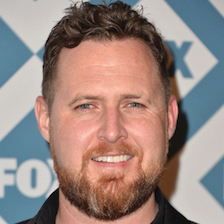

In [3]:
# Change the image path with yours.
img = image.load_img('./images/ajb.jpg', target_size=(224, 224))
img

In [4]:
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = utils.preprocess_input(x, version=1) # or version=2
preds = model.predict(x)
print('Predicted:', utils.decode_predictions(preds))

Predicted: [[["b'A.J._Buckley'", 0.97900885], ["b'David_Denman'", 0.0014457273], ["b'Carmine_Giovinazzo'", 0.0008676503], ["b'Robert_Buckley'", 0.00072456733], ["b'Eddie_Cahill'", 0.0004183303]]]


In [5]:
# Convolution Features
vgg_features = VGGFace(include_top=False, input_shape=(224, 224, 3), pooling='avg') # pooling: None, avg or max

58916864/58909280 [==============================] - 658s 11us/step


In [8]:
emb = vgg_features.predict(x)
emb.shape

(1, 512)

لود تصاویر از دیسک

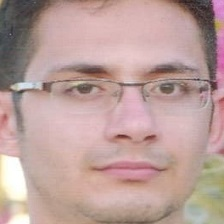

In [26]:
#read images
img1 = image.load_img('./images/1.jpg', target_size=(224, 224))
img1

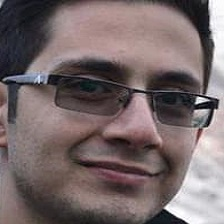

In [27]:
img2 = image.load_img('./images/2.jpg', target_size=(224, 224))
img2

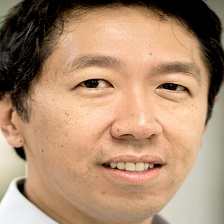

In [28]:
img3 = image.load_img('./images/3.jpg', target_size=(224, 224))
img3

In [29]:
def get_embedding(img):
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = utils.preprocess_input(x, version=1) # or version=2
    emb = vgg_features.predict(x)
    return emb

In [30]:
emb1 = get_embedding(img1)
emb2 = get_embedding(img2)
emb3 = get_embedding(img3)

In [31]:
def findEuclideanDistance(source_representation, test_representation):
    euclidean_distance = source_representation - test_representation
    euclidean_distance = np.sum(np.multiply(euclidean_distance, euclidean_distance))
    euclidean_distance = np.sqrt(euclidean_distance)
    return euclidean_distance

In [34]:
verification_threshhold = 100

In [36]:
dist = findEuclideanDistance(emb1, emb2)
is_same = dist < verification_threshhold
print ("distance img1 and img2 =", dist, " issame =", is_same)

dist = findEuclideanDistance(emb1, emb3)
is_same = dist < verification_threshhold
print ("distance img1 and img2 =", dist, " issame =", is_same)

distance img1 and img2 = 64.359505  issame = True
distance img1 and img2 = 113.92427  issame = False


In [37]:
def findCosineDistance(source_representation, test_representation):
    a = np.matmul(np.transpose(source_representation), test_representation)
    b = np.sum(np.multiply(source_representation, source_representation))
    c = np.sum(np.multiply(test_representation, test_representation))
    return 1 - (a / (np.sqrt(b) * np.sqrt(c)))

In [38]:
verification_threshhold = 0.4

In [42]:
dist = findCosineDistance(emb1[0], emb2[0])
is_same = dist < verification_threshhold
print ("distance img1 and img2 =", dist, " issame =", is_same)

dist = findCosineDistance(emb1[0], emb3[0])
is_same = dist < verification_threshhold
print ("distance img1 and img2 =", dist, " issame =", is_same)

distance img1 and img2 = 0.16969549655914307  issame = True
distance img1 and img2 = 0.4466285705566406  issame = False


sources:

    https://sefiks.com/2018/08/06/deep-face-recognition-with-keras/
    https://github.com/rcmalli/keras-vggface